# **Machine Learning Week 5**
---
> Introduction to Machine Learning <br>
> Sekolah Data, Pacmann

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
data = pd.read_csv("C:/Users/farha/Documents/pacmann/03_introduction_to_machine_learning/data/raw/w5-diabetes.csv")
data = data[["Glucose", "BloodPressure", "Outcome"]]
data["Outcome"] = data["Outcome"].apply(lambda x: "diabetes" if x==1 else "not diabetes")

print(data.shape)
data.head()

(768, 3)


,Glucose,BloodPressure,Outcome
0,148,72,diabetes
1,85,66,not diabetes
2,183,64,diabetes
3,89,66,not diabetes
4,137,40,diabetes


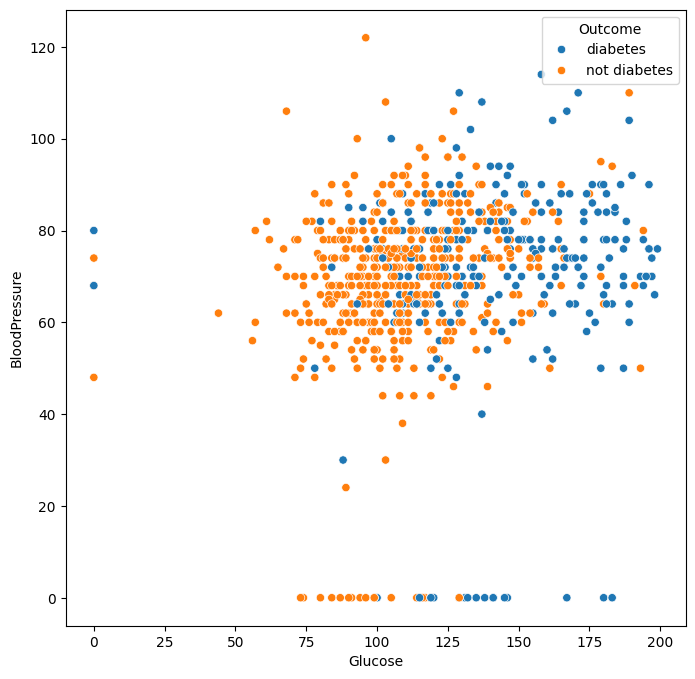

In [5]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data,
                ax = ax)

plt.show()

Lakukan validasi data

In [6]:
# Hapus data glucose == 0 & bloodpressure = 0
condition_1 = data["Glucose"] > 0
condition_2 = data["BloodPressure"] > 0

data = data[condition_1 & condition_2]

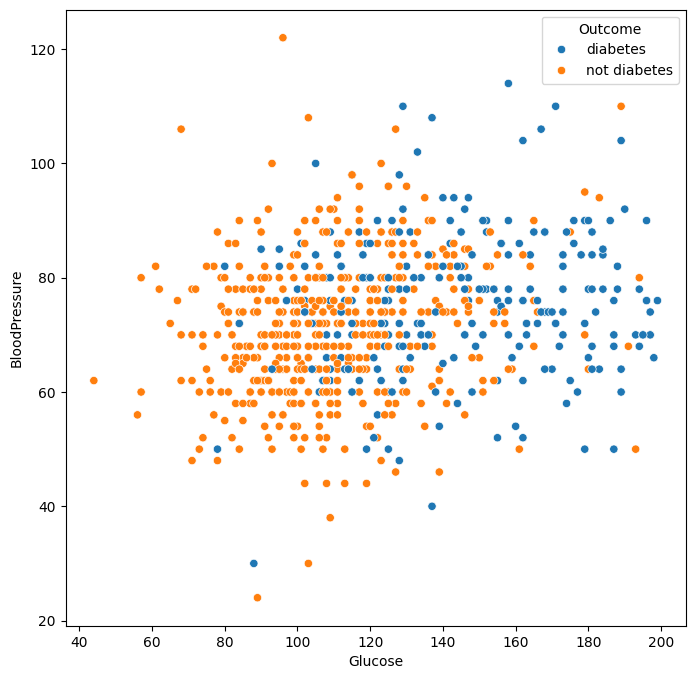

In [7]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data,
                ax = ax)

plt.show()

Periksa proporsi kelas

In [8]:
data["Outcome"].value_counts(normalize = True)

Outcome
not diabetes    0.656593
diabetes        0.343407
Name: proportion, dtype: float64

- Data imbalance (tidak 50% : 50%)
- Bisa dilakukan metode balancing data, misal: oversampling atau undersampling.
- Namun kita tidak melakukan itu untuk materi ini.

---
# **Melakukan Logistic Regression dengan sklearn**

**Split input-output**

In [9]:
# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = data,
                          target_column = "Outcome")

In [10]:
X.head()

,Glucose,BloodPressure
0,148,72
1,85,66
2,183,64
3,89,66
4,137,40


In [11]:
y.head()

0        diabetes
1    not diabetes
2        diabetes
3    not diabetes
4        diabetes
Name: Outcome, dtype: object

**Split train & test**

In [12]:
from sklearn.model_selection import train_test_split

- Data kita imbalance
- Kita siasati dengan stratify sampling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 123)

In [14]:
y_train.value_counts()

Outcome
not diabetes    382
diabetes        200
Name: count, dtype: int64

In [15]:
y_train.value_counts(normalize = True)

Outcome
not diabetes    0.656357
diabetes        0.343643
Name: proportion, dtype: float64

In [16]:
y_test.value_counts()

Outcome
not diabetes    96
diabetes        50
Name: count, dtype: int64

In [17]:
y_test.value_counts(normalize = True)

Outcome
not diabetes    0.657534
diabetes        0.342466
Name: proportion, dtype: float64

**Tentukan baseline model**

- Buat random guess berdasarkan proporsi kelas
- Probability diabetes adalah ~34% dan non-diabetes ~66%
- Gunakan `DummyClassifier`

In [18]:
from sklearn.dummy import DummyClassifier

**BASELINE PROPORSI KELAS TERBESAR**

In [19]:
# Buat objek
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(strategy='most_frequent')

In [20]:
# Predict
y_pred_dummy = dummy_clf.predict(X_train)

In [21]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_dummy)

# [[tp, fp]]
# [[fn, tn]]

array([[  0, 200],
       [  0, 382]])

In [22]:
# Cari score
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)

# Sama seperti proporsi kelas terbesar

0.6563573883161512

**BASELINE PRIOR CLASS PROBABILITY**

- cari probability muncul masing-masing kelas
- cari proporsi muncul masing-masing kelas di data training
- car total odds munculnya kelas berdasarkan prior probability tersebut

In [23]:
# Odds of guessing minority correct:
proba_minority = 0.34
proportion_minority = y_train.value_counts(normalize = True)["diabetes"]

odds_minority = proba_minority * proportion_minority
odds_minority

np.float64(0.1168384879725086)

In [24]:
# Odds of guessing majority correct:
proba_majority = 0.66
proportion_majority = y_train.value_counts(normalize = True)["not diabetes"]

odds_majority = proba_majority * proportion_majority
odds_majority

np.float64(0.4331958762886598)

In [25]:
# Odds total
odds_minority + odds_majority

np.float64(0.5500343642611684)

Cara lain, pakai stratified dummy classifier

In [26]:
# Buat objek
dummy_clf = DummyClassifier(strategy = "stratified",
                            random_state = 123)

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(random_state=123, strategy='stratified')

In [27]:
# Predict
y_pred_dummy = dummy_clf.predict(X_train)

In [28]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_dummy)

# [[tp, fp]]
# [[fn, tn]]

array([[ 66, 134],
       [128, 254]])

In [29]:
# Cari score
accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)

# Mirip seperti total odds kita

0.5498281786941581

**Handling Output**

- Possible value: {`not diabetes`, `diabetes`}
- Strateginya: Label Encoding, ubah not diabetes -> 0, diabetes -> 1

In [30]:
# Convert y_train & y_test
y_train = y_train.apply(lambda x: 1 if x == "diabetes" else 0)
y_test = y_test.apply(lambda x: 1 if x == "diabetes" else 0)

In [31]:
y_train.head()

8      1
554    0
529    0
421    0
139    0
Name: Outcome, dtype: int64

In [32]:
y_train.value_counts(normalize=True)

Outcome
0    0.656357
1    0.343643
Name: proportion, dtype: float64

In [33]:
y_test.head()

700    0
599    0
71     0
558    0
756    0
Name: Outcome, dtype: int64

In [34]:
y_test.value_counts(normalize=True)

Outcome
0    0.657534
1    0.342466
Name: proportion, dtype: float64

**Scaling Data**

In [35]:
from sklearn.preprocessing import StandardScaler

# Buat scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [36]:
# Convert X_train & X_test
def scaler_transform(data, scaler):
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled

In [37]:
X_train_scaled = scaler_transform(data = X_train,
                                  scaler = scaler)
X_train_scaled.head()

,Glucose,BloodPressure
8,2.476153,-0.200765
554,-1.220791,-0.699039
529,-0.337450,-0.615994
421,-0.893628,-0.366857
139,-0.533748,-0.034674


In [38]:
X_test_scaled = scaler_transform(data = X_test,
                                 scaler = scaler)
X_test_scaled.head()

,Glucose,BloodPressure
700,0.022429,0.297509
599,-0.402883,-2.858228
71,0.578607,-0.699039
558,-0.599181,-0.366857
756,0.513174,1.460149


**Buat Objek & Fitting**

In [39]:
# Import library
from sklearn.linear_model import LogisticRegression

In [40]:
# Buat weight class
n_samples = len(y_train)
n_classes = len(y_train.value_counts())
n_samples_j = y_train.value_counts()

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

# Kita kasih weight yang lebih besar untuk kelas 1

Outcome
0    0.76178
1    1.45500
Name: count, dtype: float64

In [41]:
# Buat objek
logreg = LogisticRegression(class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

In [42]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [43]:
# Lakukan Fitting Data
logreg_cv.fit(X = X_train_scaled,
              y = y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: np.float64(0.7617801047120419),
                                                        1: np.float64(1.455)},
                                          random_state=123,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [44]:
# Best params
logreg_cv.best_params_

{'C': np.float64(0.5455594781168515), 'penalty': 'l1'}

In [45]:
# Buat best model
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=np.float64(0.5455594781168515),
                   class_weight={0: np.float64(0.7617801047120419),
                                 1: np.float64(1.455)},
                   penalty='l1', random_state=123, solver='liblinear')

**Predict & Evaluate**

Train Dataset

In [46]:
# Buat prediksi probability
y_pred_train_proba = logreg.predict_proba(X_train_scaled)
y_pred_train_proba

# [1 - P(y = 1), P(y = 1)]

array([[0.05962135, 0.94037865],
       [0.85225979, 0.14774021],
       [0.66425899, 0.33574101],
       ...,
       [0.23035483, 0.76964517],
       [0.91901121, 0.08098879],
       [0.88771835, 0.11228165]])

In [47]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_train

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [48]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

# [[tp, fp]]
# [[fn, tn]]

array([[287,  95],
       [ 66, 134]])

In [49]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.81      0.75      0.78       382
    diabetes       0.59      0.67      0.62       200

    accuracy                           0.72       582
   macro avg       0.70      0.71      0.70       582
weighted avg       0.73      0.72      0.73       582



Test Dataset

In [50]:
# Buat prediksi probability
y_pred_test_proba = logreg.predict_proba(X_test_scaled)
y_pred_test_proba

# [1 - P(y = 1), P(y = 1)]

array([[0.51471556, 0.48528444],
       [0.7752465 , 0.2247535 ],
       [0.40339218, 0.59660782],
       [0.71931308, 0.28068692],
       [0.3157043 , 0.6842957 ],
       [0.82085444, 0.17914556],
       [0.57947047, 0.42052953],
       [0.05962135, 0.94037865],
       [0.91304705, 0.08695295],
       [0.16119261, 0.83880739],
       [0.26252389, 0.73747611],
       [0.66819478, 0.33180522],
       [0.42840946, 0.57159054],
       [0.78142064, 0.21857936],
       [0.28157683, 0.71842317],
       [0.1447157 , 0.8552843 ],
       [0.82657044, 0.17342956],
       [0.7381776 , 0.2618224 ],
       [0.67451154, 0.32548846],
       [0.76781397, 0.23218603],
       [0.85228425, 0.14771575],
       [0.82399032, 0.17600968],
       [0.1845344 , 0.8154656 ],
       [0.6506905 , 0.3493095 ],
       [0.40597871, 0.59402129],
       [0.44759626, 0.55240374],
       [0.62609251, 0.37390749],
       [0.09402235, 0.90597765],
       [0.74901951, 0.25098049],
       [0.56652707, 0.43347293],
       [0.

In [51]:
y_pred_test = logreg.predict(X_test_scaled)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [52]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

# [[tp, fp]]
# [[fn, tn]]

array([[66, 30],
       [15, 35]])

In [53]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.81      0.69      0.75        96
    diabetes       0.54      0.70      0.61        50

    accuracy                           0.69       146
   macro avg       0.68      0.69      0.68       146
weighted avg       0.72      0.69      0.70       146



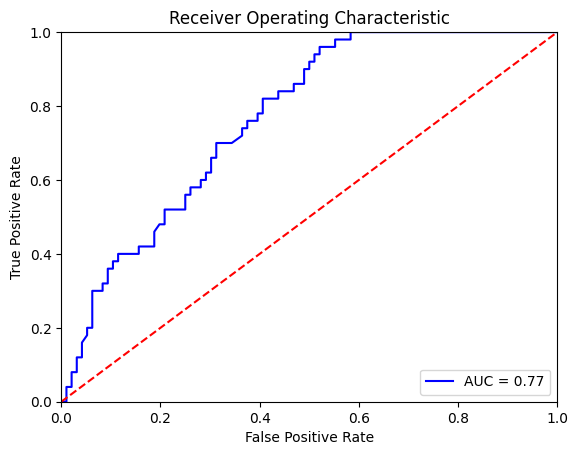

In [54]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Tampilkan hasil logistic regression**

In [55]:
# Koefisien/slope logistic regression
logreg.coef_

array([[1.19139131, 0.21313067]])

In [56]:
# Intercept linear regression
logreg.intercept_

array([-0.14900954])

Persamaan decision boundary

$$
\begin{align*}
0 &= w_{1}\hat{x}_{1} + w_{2}\hat{x}_{2} + w_{0} \\ \\
\hat{x}_{2} &= -\cfrac{w_{1}}{w_{2}}\hat{x}_{1} + \left ( -\cfrac{w_{0}}{w_{2}} \right ) \\ \\ 
\hat{x}_{2} &= m\hat{x}_{1} + c \\ \\ 
\end{align*}
$$

In [57]:
# Ekstrak
w_1_lr, w_2_lr = logreg.coef_[0]
w_0_lr = logreg.intercept_[0]

m_lr = -w_1_lr / w_2_lr
c_lr = -w_0_lr / w_2_lr

print(m_lr, c_lr)

-5.5899570855772085 0.6991463708498956


Visualkan

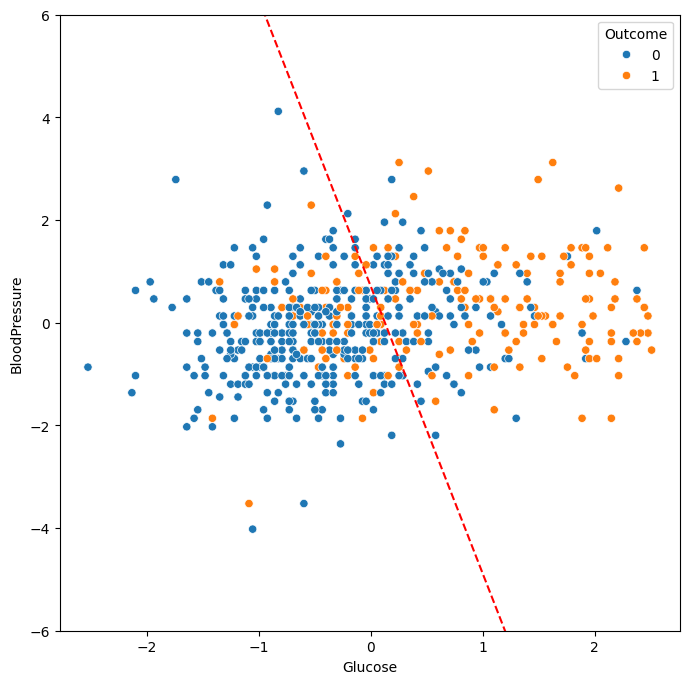

In [58]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

data_scaled = X_train_scaled.copy()
data_scaled["Outcome"] = y_train

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data_scaled,
                ax = ax)

x_support = np.linspace(data_scaled["Glucose"].min(), 
                        data_scaled["Glucose"].max(), 101)
y_support = m_lr*x_support + c_lr

ax.plot(x_support, y_support, "--r")
ax.set_ylim(-6, 6)

plt.show()

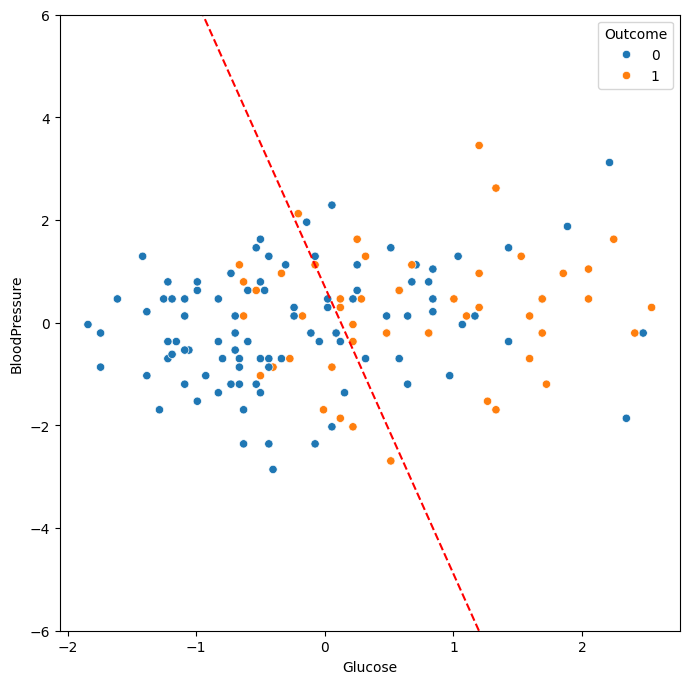

In [59]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

data_scaled = X_test_scaled.copy()
data_scaled["Outcome"] = y_test

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data_scaled,
                ax = ax)

x_support = np.linspace(data_scaled["Glucose"].min(), 
                        data_scaled["Glucose"].max(), 101)
y_support = m_lr*x_support + c_lr

ax.plot(x_support, y_support, "--r")
ax.set_ylim(-6, 6)

plt.show()

---
# **Melakukan Klasifikasi dengan Support Vector Machine**

**Intro**

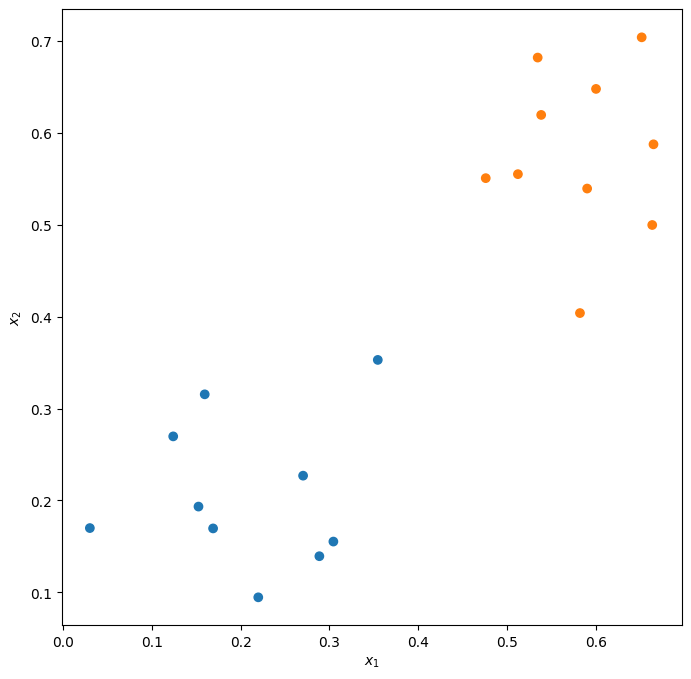

In [60]:
# Buat data dummy
from sklearn.datasets import make_blobs

X_dum, y_dum = make_blobs(n_samples = 20,
                          centers = [(0.2, 0.2), (0.6, 0.6)],
                          cluster_std = 0.07,
                          random_state = 123)

# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = np.array(sns.color_palette())
ax.scatter(X_dum[:, 0], X_dum[:, 1], c = colors[y_dum])

ax.set_xlabel("$x_{1}$")
ax.set_ylabel("$x_{2}$")
plt.show()

Buat model SVM
- Kernel -> linear
- Max Margin Classifier -> memperkecil titik masuk ke margin --> C besar

In [61]:
from sklearn.svm import SVC

mdl = SVC(kernel = "linear",
          C = 1e10)
mdl.fit(X_dum, y_dum)

SVC(C=10000000000.0, kernel='linear')

Buat decision boundary

*Persamaan Garis*

In [62]:
# Buat persamaan decision boundary
print(mdl.coef_)
print(mdl.intercept_)

[[7.55959007 5.46305231]]
[-5.60823307]


In [63]:
w_1, w_2 = mdl.coef_[0]
w_0 = mdl.intercept_

m = - w_1 / w_2
c = - w_0 / w_2

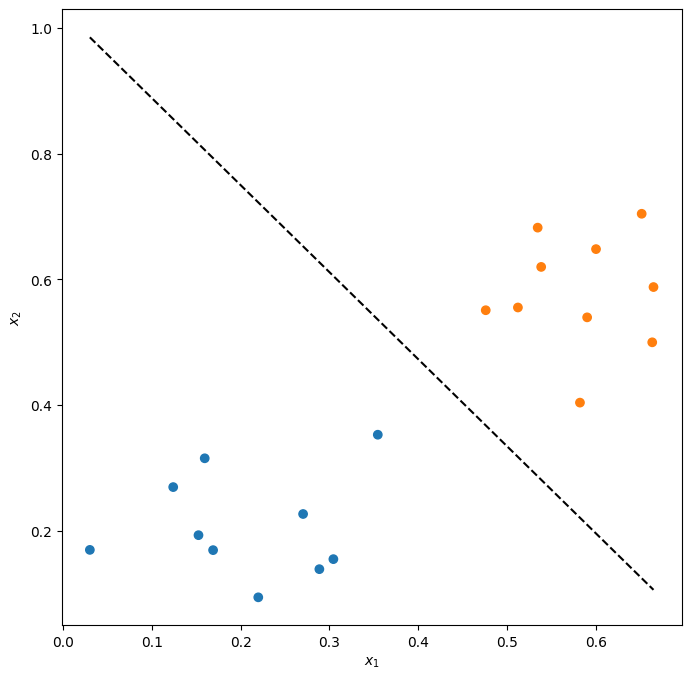

In [64]:
# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = np.array(sns.color_palette())
ax.scatter(X_dum[:, 0], X_dum[:, 1], c = colors[y_dum])

x_support = np.linspace(X_dum[:, 0].min(),
                        X_dum[:, 0].max(),
                        101)
y_support = m*x_support + c

ax.plot(x_support, y_support, "--k")

ax.set_xlabel("$x_{1}$")
ax.set_ylabel("$x_{2}$")
plt.show()

*Unit vektor*

$$
\hat{w} = \cfrac{w}{||w||}
$$

In [65]:
w_hat = mdl.coef_[0] / np.linalg.norm(mdl.coef_[0])
w_hat

array([0.8105088 , 0.58572646])

*Margin*

$$
\text{M} = \cfrac{1}{||w||}
$$

In [66]:
margin = 1 / np.linalg.norm(mdl.coef_[0])
margin

np.float64(0.10721597202601481)

*Hitung garis margin*

In [67]:
upper_pts = np.column_stack([x_support, y_support]) + w_hat * margin
lower_pts = np.column_stack([x_support, y_support]) - w_hat * margin

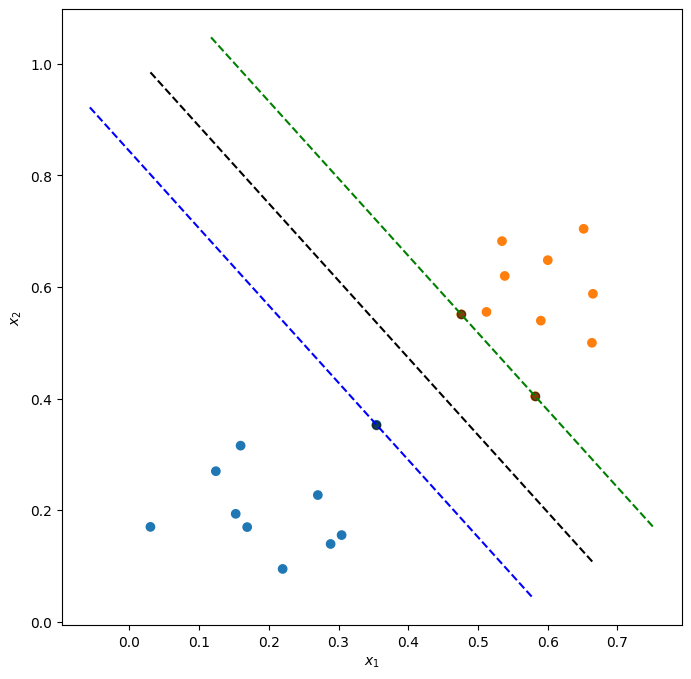

In [68]:
# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = np.array(sns.color_palette())
ax.scatter(X_dum[:, 0], X_dum[:, 1], c = colors[y_dum])

ax.plot(x_support, y_support, "--k")
ax.plot(upper_pts[:, 0], upper_pts[:, 1], "--g")
ax.plot(lower_pts[:, 0], lower_pts[:, 1], "--b")
ax.scatter(mdl.support_vectors_[:, 0], mdl.support_vectors_[:, 1], 
           c="k", alpha=.5)

ax.set_xlabel("$x_{1}$")
ax.set_ylabel("$x_{2}$")
plt.show()

Bagaimana kalau menggunakan Not Separable
- Pakai soft margin
- memperkecil C agar bisa memperbesar slack distance

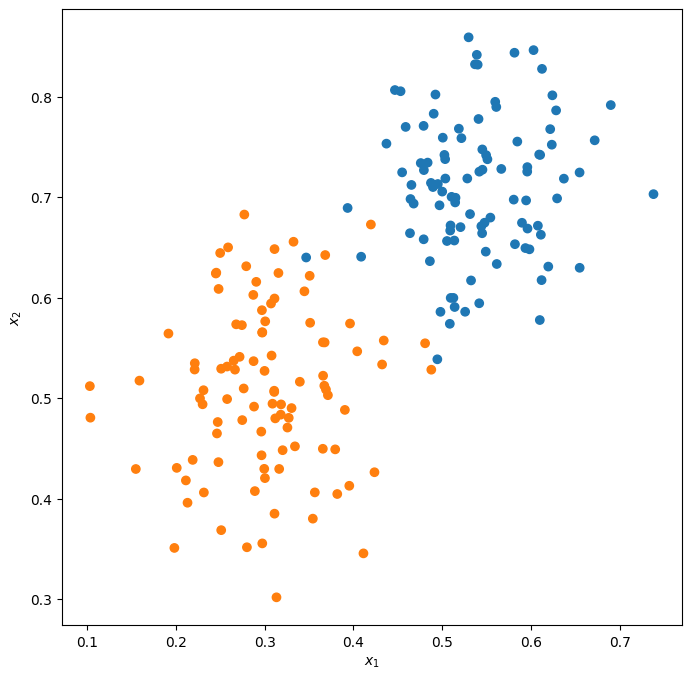

In [69]:
# Buat data dummy
from sklearn.datasets import make_blobs

X_dum, y_dum = make_blobs(n_samples = 200,
                          centers = 2,
                          cluster_std = 0.07,
                          center_box = (0, 1),
                          random_state = 3)

# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = np.array(sns.color_palette())
ax.scatter(X_dum[:, 0], X_dum[:, 1], c = colors[y_dum])

ax.set_xlabel("$x_{1}$")
ax.set_ylabel("$x_{2}$")
plt.show()

In [70]:
mdl = SVC(kernel = "linear",
          C = 100)
mdl.fit(X_dum, y_dum)

SVC(C=100, kernel='linear')

In [71]:
w_1, w_2 = mdl.coef_[0]
w_0 = mdl.intercept_

m = - w_1 / w_2
c = - w_0 / w_2

w_hat = mdl.coef_[0] / np.linalg.norm(mdl.coef_[0])
margin = 1 / np.linalg.norm(mdl.coef_[0])

x_support = np.linspace(X_dum[:, 0].min(),
                        X_dum[:, 0].max(),
                        101)
y_support = m*x_support + c

upper_pts = np.column_stack([x_support, y_support]) + w_hat * margin
lower_pts = np.column_stack([x_support, y_support]) - w_hat * margin

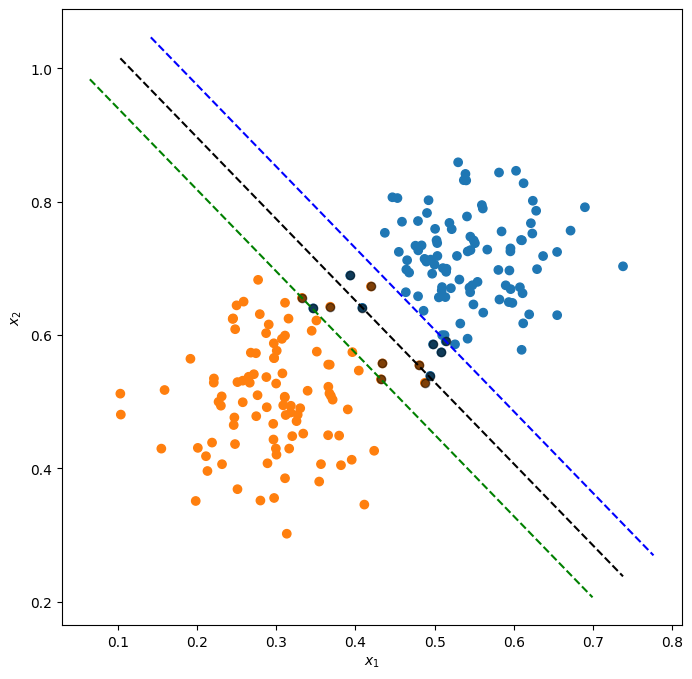

In [72]:
# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = np.array(sns.color_palette())
ax.scatter(X_dum[:, 0], X_dum[:, 1], c = colors[y_dum])

ax.plot(x_support, y_support, "--k")
ax.plot(upper_pts[:, 0], upper_pts[:, 1], "--g")
ax.plot(lower_pts[:, 0], lower_pts[:, 1], "--b")
ax.scatter(mdl.support_vectors_[:, 0], mdl.support_vectors_[:, 1], 
           c="k", alpha=.5)

ax.set_xlabel("$x_{1}$")
ax.set_ylabel("$x_{2}$")
plt.show()

Perkecil C agar lebih banyak kelonggaran

In [73]:
mdl = SVC(kernel = "linear",
          C = 10)
mdl.fit(X_dum, y_dum)

SVC(C=10, kernel='linear')

In [74]:
w_1, w_2 = mdl.coef_[0]
w_0 = mdl.intercept_

m = - w_1 / w_2
c = - w_0 / w_2

w_hat = mdl.coef_[0] / np.linalg.norm(mdl.coef_[0])
margin = 1 / np.linalg.norm(mdl.coef_[0])

x_support = np.linspace(X_dum[:, 0].min(),
                        X_dum[:, 0].max(),
                        101)
y_support = m*x_support + c

upper_pts = np.column_stack([x_support, y_support]) + w_hat * margin
lower_pts = np.column_stack([x_support, y_support]) - w_hat * margin

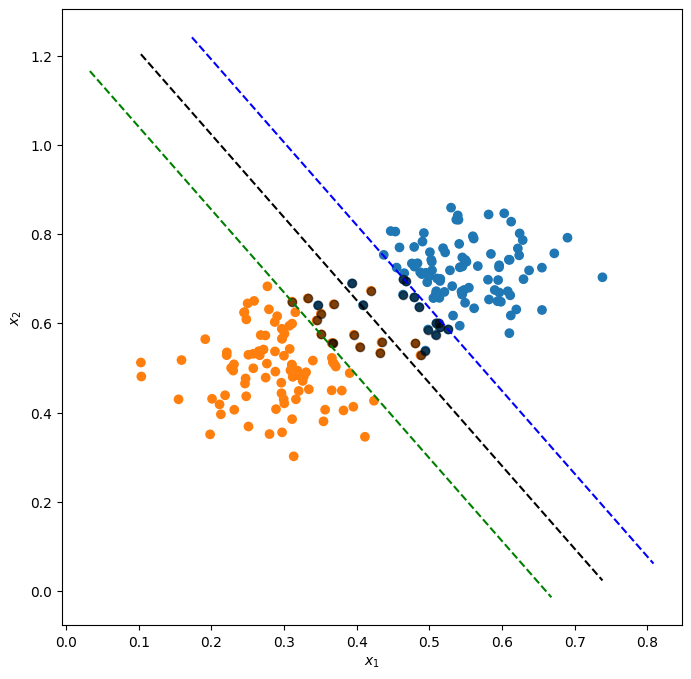

In [75]:
# Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

colors = np.array(sns.color_palette())
ax.scatter(X_dum[:, 0], X_dum[:, 1], c = colors[y_dum])

ax.plot(x_support, y_support, "--k")
ax.plot(upper_pts[:, 0], upper_pts[:, 1], "--g")
ax.plot(lower_pts[:, 0], lower_pts[:, 1], "--b")
ax.scatter(mdl.support_vectors_[:, 0], mdl.support_vectors_[:, 1], 
           c="k", alpha=.5)

ax.set_xlabel("$x_{1}$")
ax.set_ylabel("$x_{2}$")
plt.show()

Untuk kernel lain

In [76]:
# Kode dari https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=500, linewidth=2, edgecolor='k', facecolors='none', alpha=0.5);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

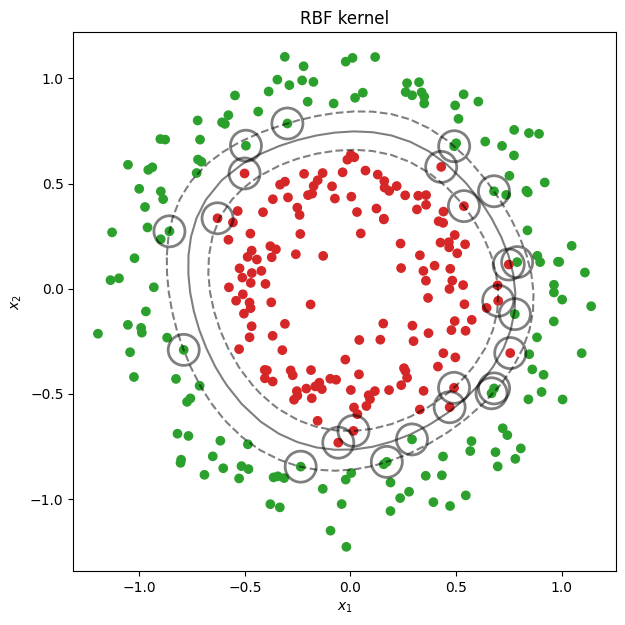

In [77]:
from sklearn.datasets import make_circles

fig, ax = plt.subplots(ncols=1, figsize=(7, 7))

X, y = make_circles(300, noise=0.1, factor=0.5, random_state=42)
ax.scatter(*X.T, color=colors[y + 2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('RBF kernel')

mdl = SVC(C=10, kernel='rbf')
mdl.fit(X, y)
plot_svc_decision_function(mdl, ax, True)

plt.show()

**Buat Objek & Fitting**

In [78]:
# Import library
from sklearn.svm import SVC

In [79]:
# Buat objek
svc = SVC(class_weight = dict(class_weight),
          random_state = 123)

In [80]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"kernel": ["linear"],
                 "C": np.logspace(-4, 4, 20)}

svc_cv = GridSearchCV(estimator = svc,
                      param_grid = search_params,
                      cv = 5)

In [81]:
# Lakukan Fitting Data
svc_cv.fit(X = X_train_scaled,
           y = y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: np.float64(0.7617801047120419),
                                         1: np.float64(1.455)},
                           random_state=123),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'kernel': ['linear']})

In [82]:
# Best params
svc_cv.best_params_

{'C': np.float64(0.004832930238571752), 'kernel': 'linear'}

Nilai C kecil, artinya 
- banyak titik yang bisa masuk ke dalam margin
- ukuran margin besar

Apa itu masuk akal?
- iya, karena data kita tidak separable

In [83]:
# Buat best model
svc = SVC(kernel = svc_cv.best_params_["kernel"],
          C = svc_cv.best_params_["C"],
          probability = True,
          class_weight = dict(class_weight),
          random_state = 123)

# Fit model
svc.fit(X_train_scaled, y_train)

SVC(C=np.float64(0.004832930238571752),
    class_weight={0: np.float64(0.7617801047120419), 1: np.float64(1.455)},
    kernel='linear', probability=True, random_state=123)

**Predict & Evaluate**

Train Dataset

In [84]:
# Buat prediksi probability
y_pred_train_proba_svc = svc.predict_proba(X_train_scaled)
y_pred_train_proba_svc

# [1 - P(y = 1), P(y = 1)]

array([[0.11656521, 0.88343479],
       [0.92132565, 0.07867435],
       [0.80236772, 0.19763228],
       ...,
       [0.3854489 , 0.6145511 ],
       [0.96234526, 0.03765474],
       [0.94384196, 0.05615804]])

In [85]:
y_pred_train_svc = svc.predict(X_train_scaled)
y_pred_train_svc

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [86]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train_svc)

# [[tp, fp]]
# [[fn, tn]]

array([[304,  78],
       [ 76, 124]])

In [87]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_svc,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.80      0.80      0.80       382
    diabetes       0.61      0.62      0.62       200

    accuracy                           0.74       582
   macro avg       0.71      0.71      0.71       582
weighted avg       0.74      0.74      0.74       582



Test Dataset

In [88]:
# Buat prediksi probability
y_pred_test_proba_svc = svc.predict_proba(X_test_scaled)
y_pred_test_proba_svc

# [1 - P(y = 1), P(y = 1)]

array([[0.6592536 , 0.3407464 ],
       [0.90322651, 0.09677349],
       [0.58856681, 0.41143319],
       [0.83517181, 0.16482819],
       [0.42726657, 0.57273343],
       [0.90145568, 0.09854432],
       [0.77343846, 0.22656154],
       [0.11656521, 0.88343479],
       [0.94890889, 0.05109111],
       [0.30804486, 0.69195514],
       [0.45944054, 0.54055946],
       [0.80677047, 0.19322953],
       [0.57699476, 0.42300524],
       [0.88650638, 0.11349362],
       [0.39818071, 0.60181929],
       [0.24889088, 0.75110912],
       [0.88263676, 0.11736324],
       [0.86344013, 0.13655987],
       [0.78359059, 0.21640941],
       [0.87859013, 0.12140987],
       [0.91241342, 0.08758658],
       [0.89154971, 0.10845029],
       [0.28370423, 0.71629577],
       [0.7945814 , 0.2054186 ],
       [0.57574568, 0.42425432],
       [0.59524689, 0.40475311],
       [0.80515283, 0.19484717],
       [0.15565632, 0.84434368],
       [0.85733505, 0.14266495],
       [0.73629396, 0.26370604],
       [0.

In [89]:
y_pred_test_svc = svc.predict(X_test_scaled)
y_pred_test_svc

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [90]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_svc)

# [[tp, fp]]
# [[fn, tn]]

array([[69, 27],
       [20, 30]])

In [91]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_svc,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.78      0.72      0.75        96
    diabetes       0.53      0.60      0.56        50

    accuracy                           0.68       146
   macro avg       0.65      0.66      0.65       146
weighted avg       0.69      0.68      0.68       146



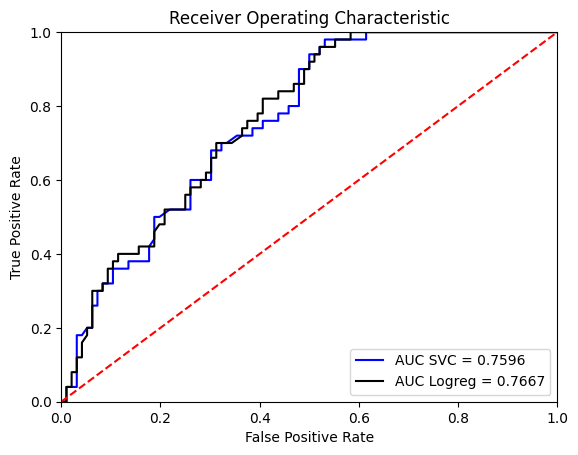

In [92]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test,
                                            y_pred_test_proba_svc[:, 1])
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svc, tpr_svc, 'b', label = 'AUC SVC = %0.4f' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, 'k', label = 'AUC Logreg = %0.4f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Tampilkan hasil logistic regression**

In [93]:
# Koefisien/slope logistic regression
svc.coef_

array([[0.64311604, 0.18573128]])

In [94]:
# Intercept linear regression
svc.intercept_

array([-0.22258028])

Persamaan decision boundary

$$
\begin{align*}
0 &= w_{1}\hat{x}_{1} + w_{2}\hat{x}_{2} + w_{0} \\ \\
\hat{x}_{2} &= -\cfrac{w_{1}}{w_{2}}\hat{x}_{1} + \left ( -\cfrac{w_{0}}{w_{2}} \right ) \\ \\ 
\hat{x}_{2} &= m\hat{x}_{1} + c \\ \\ 
\end{align*}
$$

In [95]:
# Ekstrak
w_1, w_2 = svc.coef_[0]
w_0 = svc.intercept_[0]

m_svc = -w_1 / w_2
c_svc = -w_0 / w_2

print(m_svc, c_svc)

-3.4626156947421904 1.1983995741267262


Visualkan

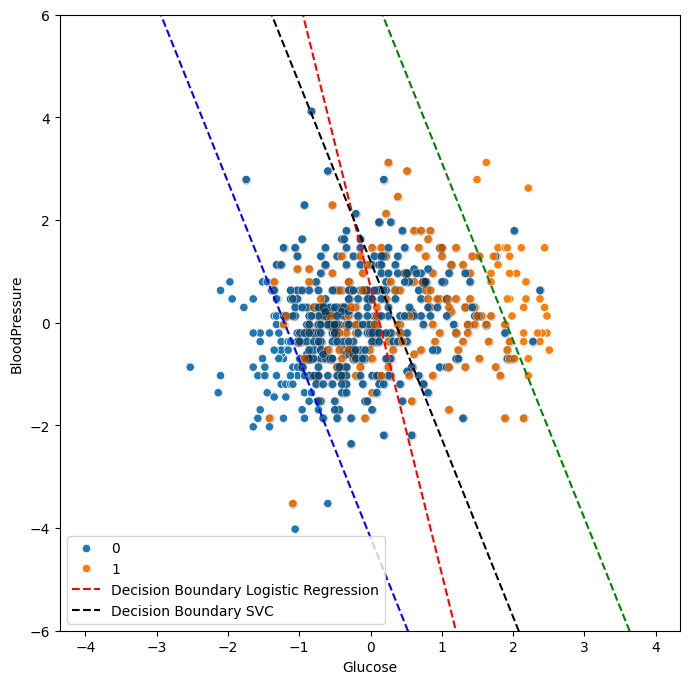

In [96]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

data_scaled = X_train_scaled.copy()
data_scaled["Outcome"] = y_train

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data_scaled,
                ax = ax)

x_support = np.linspace(data_scaled["Glucose"].min(), 
                        data_scaled["Glucose"].max(), 101)
y_support_lr = m_lr*x_support + c_lr
y_support_svc = m_svc*x_support + c_svc

ax.plot(x_support, y_support_lr, "--r", label="Decision Boundary Logistic Regression")
ax.plot(x_support, y_support_svc, "--k", label="Decision Boundary SVC")

w_hat = svc.coef_[0] / np.linalg.norm(svc.coef_[0])
margin = 1 / np.linalg.norm(svc.coef_[0])
upper_pts = np.column_stack([x_support, y_support_svc]) + w_hat * margin
lower_pts = np.column_stack([x_support, y_support_svc]) - w_hat * margin
ax.plot(upper_pts[:, 0], upper_pts[:, 1], "--g")
ax.plot(lower_pts[:, 0], lower_pts[:, 1], "--b")
ax.scatter(svc.support_vectors_[:, 0],
           svc.support_vectors_[:, 1],
           c = 'k', alpha = .1)

ax.set_ylim(-6, 6)

plt.legend()
plt.show()

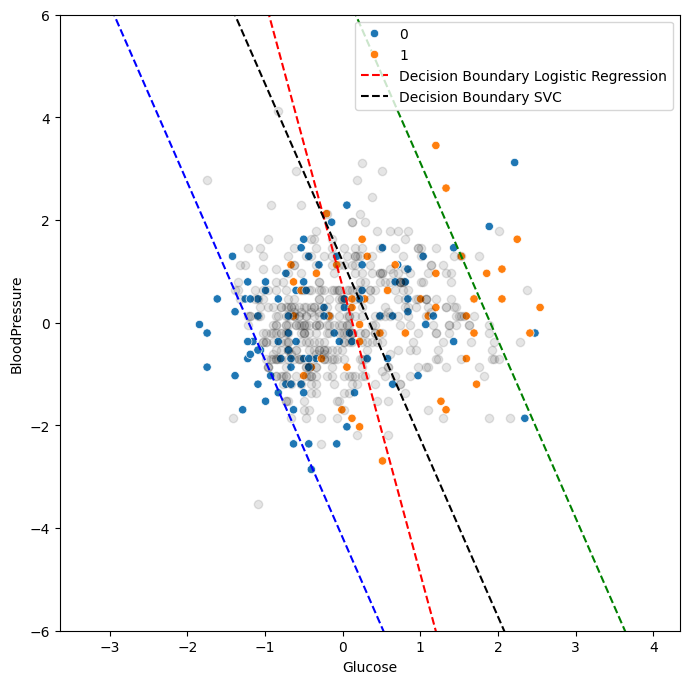

In [97]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

data_scaled = X_test_scaled.copy()
data_scaled["Outcome"] = y_test

sns.scatterplot(x = "Glucose",
                y = "BloodPressure",
                hue = "Outcome",
                data = data_scaled,
                ax = ax)

x_support = np.linspace(data_scaled["Glucose"].min(), 
                        data_scaled["Glucose"].max(), 101)
y_support_lr = m_lr*x_support + c_lr
y_support_svc = m_svc*x_support + c_svc

ax.plot(x_support, y_support_lr, "--r", label="Decision Boundary Logistic Regression")
ax.plot(x_support, y_support_svc, "--k", label="Decision Boundary SVC")

w_hat = svc.coef_[0] / np.linalg.norm(svc.coef_[0])
margin = 1 / np.linalg.norm(svc.coef_[0])
upper_pts = np.column_stack([x_support, y_support_svc]) + w_hat * margin
lower_pts = np.column_stack([x_support, y_support_svc]) - w_hat * margin
ax.plot(upper_pts[:, 0], upper_pts[:, 1], "--g")
ax.plot(lower_pts[:, 0], lower_pts[:, 1], "--b")
ax.scatter(svc.support_vectors_[:, 0],
           svc.support_vectors_[:, 1],
           c = 'k', alpha = .1)

ax.set_ylim(-6, 6)

plt.legend()
plt.show()

**Better Search**

In [98]:
# Buat objek
svc_ver_1 = SVC(class_weight = dict(class_weight),
                max_iter = 10000,
                random_state = 123)

In [99]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"kernel": ["linear", "poly", "rbf"],
                 "degree": [2, 3, 4, 5],
                 "C": np.logspace(-4, 4, 20)}

svc_cv_ver_1 = GridSearchCV(estimator = svc_ver_1,
                            param_grid = search_params,
                            cv = 5)

In [100]:
# Lakukan Fitting Data
svc_cv_ver_1.fit(X = X_train_scaled,
                 y = y_train)

c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\farha\Documents\pacmann\pacmann

GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: np.float64(0.7617801047120419),
                                         1: np.float64(1.455)},
                           max_iter=10000, random_state=123),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [101]:
# Best params
svc_cv_ver_1.best_params_

{'C': np.float64(0.615848211066026), 'degree': 3, 'kernel': 'poly'}

In [102]:
# Buat best model
svc_ver_1 = SVC(kernel = svc_cv_ver_1.best_params_["kernel"],
                C = svc_cv_ver_1.best_params_["C"],
                degree = svc_cv_ver_1.best_params_["degree"],
                probability = True,
                class_weight = dict(class_weight),
                random_state = 123)

# Fit model
svc_ver_1.fit(X_train_scaled, y_train)

SVC(C=np.float64(0.615848211066026),
    class_weight={0: np.float64(0.7617801047120419), 1: np.float64(1.455)},
    kernel='poly', probability=True, random_state=123)

**Predict & Evaluate**

Train Dataset

In [103]:
# Buat prediksi probability
y_pred_train_proba_svc_ver_1 = svc_ver_1.predict_proba(X_train_scaled)
y_pred_train_proba_svc_ver_1

# [1 - P(y = 1), P(y = 1)]

array([[0.01829676, 0.98170324],
       [0.84439989, 0.15560011],
       [0.71425399, 0.28574601],
       ...,
       [0.57012975, 0.42987025],
       [0.97749707, 0.02250293],
       [0.92675661, 0.07324339]])

In [104]:
y_pred_train_svc_ver_1 = svc_ver_1.predict(X_train_scaled)
y_pred_train_svc_ver_1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [105]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train_svc_ver_1)

# [[tp, fp]]
# [[fn, tn]]

array([[356,  26],
       [108,  92]])

In [106]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_svc_ver_1,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.77      0.93      0.84       382
    diabetes       0.78      0.46      0.58       200

    accuracy                           0.77       582
   macro avg       0.77      0.70      0.71       582
weighted avg       0.77      0.77      0.75       582



Test Dataset

In [107]:
# Buat prediksi probability
y_pred_test_proba_svc_ver_1 = svc_ver_1.predict_proba(X_test_scaled)
y_pred_test_proba_svc_ver_1

# [1 - P(y = 1), P(y = 1)]

array([[7.04104992e-01, 2.95895008e-01],
       [8.83888325e-01, 1.16111675e-01],
       [6.87022466e-01, 3.12977534e-01],
       [7.24754254e-01, 2.75245746e-01],
       [6.25407299e-01, 3.74592701e-01],
       [7.98452209e-01, 2.01547791e-01],
       [7.08884287e-01, 2.91115713e-01],
       [1.82967595e-02, 9.81703241e-01],
       [9.47112484e-01, 5.28875162e-02],
       [3.03801476e-01, 6.96198524e-01],
       [5.00000000e-01, 5.00000000e-01],
       [7.16284443e-01, 2.83715557e-01],
       [6.99126857e-01, 3.00873143e-01],
       [7.84130613e-01, 2.15869387e-01],
       [6.20336653e-01, 3.79663347e-01],
       [3.76695183e-01, 6.23304817e-01],
       [8.69640258e-01, 1.30359742e-01],
       [7.62810309e-01, 2.37189691e-01],
       [7.21348855e-01, 2.78651145e-01],
       [7.73789713e-01, 2.26210287e-01],
       [8.45830814e-01, 1.54169186e-01],
       [8.14468878e-01, 1.85531122e-01],
       [4.83048806e-01, 5.16951194e-01],
       [7.13269311e-01, 2.86730689e-01],
       [6.970534

In [108]:
y_pred_test_svc_ver_1 = svc_ver_1.predict(X_test_scaled)
y_pred_test_svc_ver_1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [109]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_svc_ver_1)

# [[tp, fp]]
# [[fn, tn]]

array([[85, 11],
       [30, 20]])

In [110]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_svc_ver_1,
                            target_names = ["not diabetes", "diabetes"]))

              precision    recall  f1-score   support

not diabetes       0.74      0.89      0.81        96
    diabetes       0.65      0.40      0.49        50

    accuracy                           0.72       146
   macro avg       0.69      0.64      0.65       146
weighted avg       0.71      0.72      0.70       146



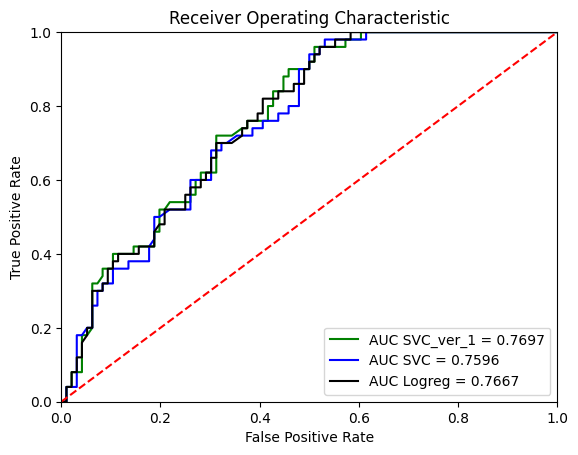

In [111]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_svc_ver_1, tpr_svc_ver_1, threshold_svc_ver_1 = roc_curve(y_test,
                                                              y_pred_test_proba_svc_ver_1[:, 1])
roc_auc_svc_ver_1 = auc(fpr_svc_ver_1, tpr_svc_ver_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svc_ver_1, tpr_svc_ver_1, 'g', label = 'AUC SVC_ver_1 = %0.4f' % roc_auc_svc_ver_1)
plt.plot(fpr_svc, tpr_svc, 'b', label = 'AUC SVC = %0.4f' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, 'k', label = 'AUC Logreg = %0.4f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- SVC versi_1 ini lebih baik dibanding yang lain